# **importing the needded modules**

In [ ]:
import os
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from plotly.express import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [20]:
from yellowbrick.classifier import ConfusionMatrix

# **importing the Dataset**

## The link for the Dataset
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [21]:
df = pd.read_csv("creditcard.csv")

# **checking For Null**

In [22]:
df.isna().sum()
df.iloc[:,:30].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


# **plotting Scatter Matrix**

In [23]:
columns_to_plot = ['Time','Amount','Class']
data_subset = df[columns_to_plot]

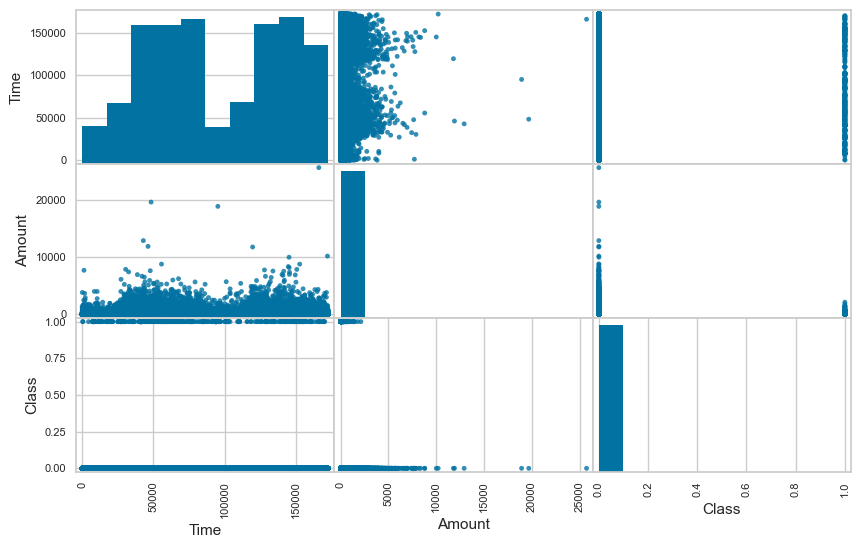

In [24]:
pd.plotting.scatter_matrix(data_subset,alpha=0.8,figsize=(10,6),diagonal='hist')
plt.show()

# **Plotting a Correlation Matrix**

In [25]:
df.corr().style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


# **showing the Data distribution**

<Axes: >

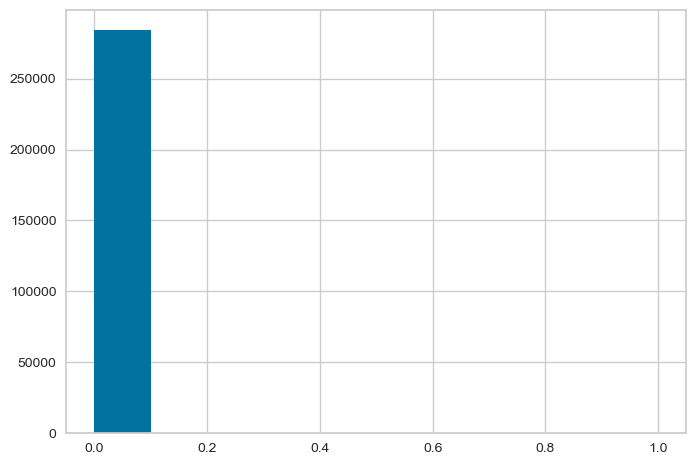

In [26]:
df['Class'].hist()

## **Create a Class and its predictors**

In [27]:
x_df = df.iloc[:,:-1]
y_df = df['Class']

# **Scaling the Data**

In [28]:
scaler = StandardScaler()

scaled_x = scaler.fit_transform(x_df)
scaled_y = y_df

# **Splitting The data into Train and Test**

In [29]:
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test = train_test_split(scaled_x,scaled_y,test_size=0.20,random_state=13)
scaled_x_train.shape,scaled_x_test.shape

((227845, 30), (56962, 30))

# **Find the most efficient parameters to build a Neural Network**

In [ ]:
#testing Neural Network Params
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes':[(16,16),(16,),(16,16,16)],
          'activation':['logistic','relu','tanh'],
          'solver':['sgd','lbfgs','adam']}
grid_search = GridSearchCV(estimator=MLPClassifier(),param_grid=params)

grid_search.fit(scaled_x,scaled_y)

print('MLP best_estimator -> {}'.format(grid_search.best_estimator_))
print('MLP best params -> {}'.format(grid_search.best_params_))


C:\Users\Alireza217\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


## Due to the extensive Time needed to Find the parameters by running the code These are the suggested parameters:

In [ ]:
#{'activation': 'logistic', 'hidden_layer_sizes': (16,), 'solver': 'adam', 'verbose': 'True'}

# Cross Validating the Model

In [30]:
from sklearn.model_selection import cross_val_score

neural_model = MLPClassifier(activation='logistic',hidden_layer_sizes=(16,),solver='adam',verbose=True)
score = cross_val_score(neural_model,scaled_x,scaled_y,cv=10,verbose=1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.08194771
Iteration 2, loss = 0.00704608
Iteration 3, loss = 0.00449362
Iteration 4, loss = 0.00389418
Iteration 5, loss = 0.00363585
Iteration 6, loss = 0.00348540
Iteration 7, loss = 0.00331142
Iteration 8, loss = 0.00315591
Iteration 9, loss = 0.00302034
Iteration 10, loss = 0.00291157
Iteration 11, loss = 0.00282742
Iteration 12, loss = 0.00274492
Iteration 13, loss = 0.00268300
Iteration 14, loss = 0.00264401
Iteration 15, loss = 0.00259490
Iteration 16, loss = 0.00255704
Iteration 17, loss = 0.00252917
Iteration 18, loss = 0.00248954
Iteration 19, loss = 0.00247133
Iteration 20, loss = 0.00243755
Iteration 21, loss = 0.00241834
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.13380011
Iteration 2, loss = 0.00964328
Iteration 3, loss = 0.00543851
Iteration 4, loss = 0.00447321
Iteration 5, loss = 0.00411319
Iteration 6, loss = 0.00390390
Iteration 7, loss = 0.00372712
Iteration 8, loss = 0.00353850

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.4min finished


# Showing The Mean and coeficient statics

In [31]:
print('Mean: {}'.format(round(score.mean(),ndigits=4)))
print('Coeficient of Variance: {}%'.format((score.std()/len(score))*100))

Mean: 0.9994
Coeficient of Variance: 0.0036334300360959257%


# building the Model

In [32]:
model = MLPClassifier(activation='logistic',hidden_layer_sizes=(16,),solver='adam',verbose=True)
model.fit(scaled_x_train,scaled_y_train)

Iteration 1, loss = 0.08194939
Iteration 2, loss = 0.00897451
Iteration 3, loss = 0.00553849
Iteration 4, loss = 0.00465950
Iteration 5, loss = 0.00432120
Iteration 6, loss = 0.00409995
Iteration 7, loss = 0.00389271
Iteration 8, loss = 0.00368781
Iteration 9, loss = 0.00349637
Iteration 10, loss = 0.00333719
Iteration 11, loss = 0.00320271
Iteration 12, loss = 0.00311939
Iteration 13, loss = 0.00304634
Iteration 14, loss = 0.00298555
Iteration 15, loss = 0.00294882
Iteration 16, loss = 0.00289654
Iteration 17, loss = 0.00287990
Iteration 18, loss = 0.00284945
Iteration 19, loss = 0.00281722
Iteration 20, loss = 0.00280640
Iteration 21, loss = 0.00276610
Iteration 22, loss = 0.00275294
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(16,), verbose=True)

In [33]:
pred = model.predict(scaled_x_test)

print(classification_report(pred,scaled_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.82      0.88      0.85        84

    accuracy                           1.00     56962
   macro avg       0.91      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# plotting the Confiusion Matrix to check the Models performance

0.9995435553526912

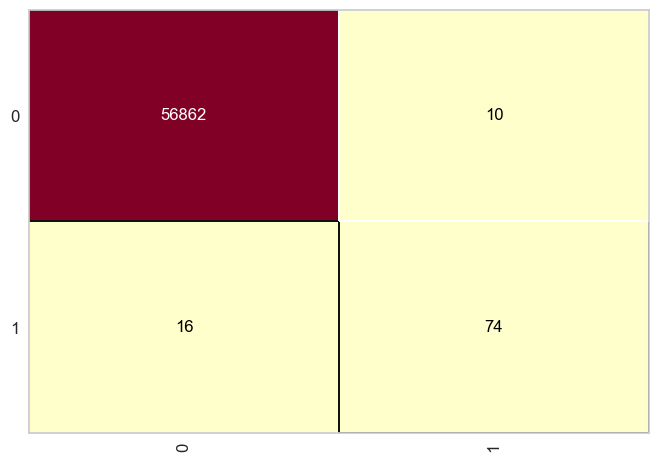

In [34]:
#instantiating ConfusionMatrix class
cm = ConfusionMatrix(model)
#training the model
cm.fit(scaled_x_train,scaled_y_train)
#plotting the confusion matrix
cm.score(scaled_x_test,scaled_y_test)